In [1]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn import metrics

import numpy as np
import os

In [2]:
X_train = np.load('Data/x_train.npy')
X_test = np.load('Data/x_test.npy')
y_train = np.load('Data/y_train.npy')
y_test = np.load('Data/y_test.npy')

print('shape X_train: ', np.shape(X_train))

shape X_train:  (60000, 28, 28)


In [3]:
# scaling data
X_train = X_train / 255
X_test = X_test / 255

In [4]:
# convert number to single member array(for gray image, if rgb convert to 3 member array)
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [5]:
# One Hot Encoding y
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [6]:
simple_model = Sequential([
    Flatten(input_shape=X_train[0].shape),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
simple_model.title = 'SimpleModel'

simple_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
conv_model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=X_train[0].shape),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
conv_model.title = 'ConvModel'

conv_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                      

              SimpleModel               
Epoch 1/15
200/200 [==============================] - 2s 7ms/step - loss: 0.4625 - accuracy: 0.8644 - val_loss: 0.2051 - val_accuracy: 0.9368
Epoch 2/15
200/200 [==============================] - 1s 6ms/step - loss: 0.1538 - accuracy: 0.9550 - val_loss: 0.1202 - val_accuracy: 0.9631
Epoch 3/15
200/200 [==============================] - 1s 6ms/step - loss: 0.1087 - accuracy: 0.9670 - val_loss: 0.1000 - val_accuracy: 0.9691
Epoch 4/15
200/200 [==============================] - 1s 6ms/step - loss: 0.0822 - accuracy: 0.9749 - val_loss: 0.0877 - val_accuracy: 0.9735
Epoch 5/15
200/200 [==============================] - 1s 6ms/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 0.1055 - val_accuracy: 0.9665
Epoch 6/15
200/200 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0829 - val_accuracy: 0.9741
Epoch 7/15
200/200 [==============================] - 1s 6ms/step - loss: 0.0430 - accuracy: 0.9863 - val_l

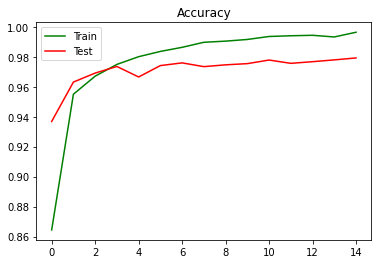






               ConvModel                
Epoch 1/15
200/200 [==============================] - 41s 200ms/step - loss: 0.3109 - accuracy: 0.9119 - val_loss: 0.0760 - val_accuracy: 0.9764
Epoch 2/15
200/200 [==============================] - 36s 182ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0458 - val_accuracy: 0.9847
Epoch 3/15
200/200 [==============================] - 37s 186ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0366 - val_accuracy: 0.9892
Epoch 4/15
200/200 [==============================] - 36s 182ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 5/15
200/200 [==============================] - 38s 188ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0295 - val_accuracy: 0.9905
Epoch 6/15
200/200 [==============================] - 38s 190ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0287 - val_accuracy: 0.9901
Epoch 7/15
200/200 [==============================] - 37s 188ms/step - loss: 0.0186 

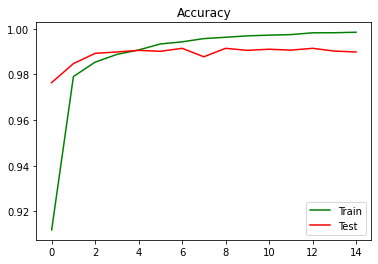

In [9]:
for model in [simple_model, conv_model]:
    print(model.title.center(40))
    history = model.fit(X_train, y_train_ohe, epochs=15, validation_data=(X_test, y_test_ohe), batch_size=300)
    model.save(f"{model.title}.h5")

    y_pred_ohe = model.predict(X_test)
    y_pred = list(map(np.argmax, y_pred_ohe))
    print(metrics.classification_report(y_test, y_pred))

    plt.plot(history.history['accuracy'], color='green', label='Train')
    plt.plot(history.history['val_accuracy'], color='red', label='Test')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

    print('\n' * 4)